# Data.Trek 2021 - Week 2 : Data Prepocessing and Cleaning in Python
## Your journey in data prepocessing and cleaning with pandas

Author: Savandara Ladyson Besse, UdeM - Département de Biochimie et médecine moléculaire

![text here](./images/pandas.jpg)


## Useful readings about pandas
- <a href='https://pandas.pydata.org/docs/user_guide/10min.html#min'>10 min tutorial on pandas</a>
- <a href='https://pandas.pydata.org/docs/user_guide/index.html#user-guide'>All the secrets about pandas</a>

## Credits
- Inspiration for the plan of this tutorial from <a href='https://towardsdatascience.com/data-wrangling-with-pandas-5b0be151df4e'>Towards data science</a>
- Dataset 1: Breast cancer data from <a href='https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)'>UCI</a>
- Dataset 2: Generated dataset based on the graduated bioinformatics alumni list from the biochemistry department of UdeM

## Today's tutorial
1. Data exploration
2. Accessing, slicing and selecting data
3. Dealing with missing values
4. Dealing with duplicated values
5. Customizing your dataframe (filter by columns or rows)
6. Your time to play
<br><br>

_______ 

<br>

### Situation 1: 
### You have been hired as data scientist at the Montreal Cancer Treatment Institute. Your new lab told you that they have a really insteresting dataset of breast cancer data and they want you to check if the table can be used without any changes.
### How will you do?

In [3]:
import re 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### I. Data exploration

### __Determinant choice__: What do you want to do, first?
- [ ]  Upload the data in my notebook now! - 1
- [ ]  Take a look on the data, first! - 2

In [4]:
breast_data_path = 'https://raw.githubusercontent.com/ladyson1806/AEBINUM/master/datatrek_2021/data/breast_cancer_data.csv' #### change with aebinum when done

In [5]:
#### If you choose the choice 1, then compute this cell
breast_dataset = pd.read_csv(breast_data_path)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 3


Let's check the file then...

In [6]:
#### If you choose the choice 2, then compute this cell
breast_dataset = pd.read_csv(breast_data_path, comment='#')

- Other possible solution:<br>
`breast_dataset = pd.read_csv('./data/breast_cancer_data.csv', skiprows=21)`

<h4 align='center'> By the way, what does mean CSV?</h4>

- Let's take a look to our table now! It loads into a python object called dataframe.

> NB: If you are curious about how create a dataframe from scratch, take a look <a href='https://www.geeksforgeeks.org/python-pandas-dataframe/'>here</a>

In [7]:
breast_dataset

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


NB: You could visualize all the dataset table on you jupyter notebook using the following lines: 
```
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```
But it will make your jupyter notebook pretty slow (displaying the whole dataset will consume your raw memory)

### General questions about the dataset

### 1. How many rows and columns do we have?

In [8]:
rows, columns = breast_dataset.shape
print(f'This dataset has {rows} rows and {columns} columns')

This dataset has 699 rows and 12 columns


### 2. What are the type of the values in each column?

In [9]:
 breast_dataset.dtypes

patient_id                 int64
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                     object
doctor_name               object
dtype: object

### 3. How can we check the number of each unique value per column?

In [10]:
breast_dataset.nunique()

patient_id               645
clump_thickness           10
cell_size_uniformity      10
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               11
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
doctor_name                4
dtype: int64

### 4. Do you want to see some statistics? Are all the columns there? Why?

In [11]:
breast_dataset.describe()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,698.000000,698.000000,699.000000,699.000000,699.000000,695.000000,698.000000,699.000000
mean,1.071704e+06,4.416905,3.137536,3.207439,2.793991,3.216023,3.447482,2.868195,1.589413
std,6.170957e+05,2.817673,3.052575,2.971913,2.843163,2.214300,2.441191,3.055647,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
#### You can customize the shown percentiles
breast_dataset.describe(percentiles=[0.1,0.5, 0.9])

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,698.000000,698.000000,699.000000,699.000000,699.000000,695.000000,698.000000,699.000000
mean,1.071704e+06,4.416905,3.137536,3.207439,2.793991,3.216023,3.447482,2.868195,1.589413
std,6.170957e+05,2.817673,3.052575,2.971913,2.843163,2.214300,2.441191,3.055647,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10%,5.632146e+05,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
90%,1.311261e+06,9.000000,9.000000,8.000000,8.000000,6.000000,7.000000,9.000000,3.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### 5. How can we count the number of values for categorical data?

In [13]:
#### How many patients have each doctor?
breast_dataset.groupby(by=['doctor_name']).size()   # This aggreates the data by the column name
                                                    # and pass the aggregation function (size = count)

doctor_name
Dr. Doe      185
Dr. Lee      181
Dr. Smith    176
Dr. Wong     157
dtype: int64

> More about the groupby function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

### EXERCISE: #### Remove the answers in the final version
### Answer to the following questions, and provide the line that helped you to give the answer:

1. How many unique patients do we have in this study? <br> 
645 - `breast_dataset.nunique()['patient_id']`
1. What type of values contain the column marginal_adhesion? <br> 
int64 - `breast_dataset.dtypes['marginal_adhesion']`
1. What is the minimum size that can describe the cell uniformity? <br> 
1 - `breast_dataset['cell_size_uniformity'].min()`
1. What is the maximal number of counted mitoses? <br>
10 - `breast_dataset['mitoses'].max()`
1. How many patients with a severe type of breast cancer has each doctor? (hint, use the groupby function) <br> print the result of `breast_dataset.groupby(by=['doctor_name', 'class']).size()`

### EXTRA QUESTIONS

6. Create the dataframe containing the answer of the question 5
    - Hint: Put the counts in a column called 'count'
7. Use this dataframe to plot a barplot graph with the `seaborn` package 
    - Hint: `seaborn.barplot()` documentation: https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
8. Put your code for question 1 & 2 in two different functions
    - How to write a function: https://swcarpentry.github.io/python-novice-gapminder/16-writing-functions/
9. Write a function that answers to question 1 & 2 at the same time


_______ 

In [14]:
#### Question 6.
question_5_answer = {'count': breast_dataset.groupby(by=['doctor_name', 'class']).size()}
patient_type_per_doctor = pd.DataFrame(question_5_answer).reset_index() 
patient_type_per_doctor

,doctor_name,class,count
0,Dr. Doe,benign,127
1,Dr. Doe,malignant,58
2,Dr. Lee,benign,121
3,Dr. Lee,malignant,60
4,Dr. Smith,benign,102
5,Dr. Smith,malignant,74
6,Dr. Wong,benign,108
7,Dr. Wong,malignant,49


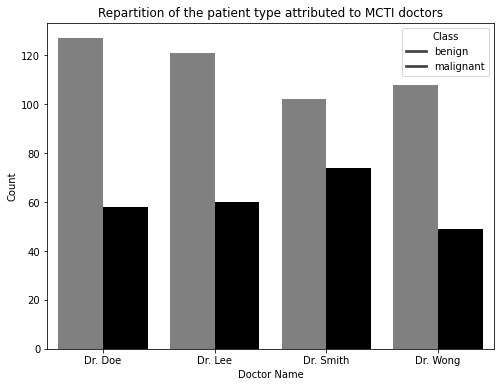

In [15]:
#### Question 7.
fig = plt.figure(figsize=(8,6))
sns.barplot(data=patient_type_per_doctor, y='count', x='doctor_name', hue='class', palette=['gray', 'black'])
plt.xlabel('Doctor Name')
plt.ylabel('Count')
plt.legend(title='Class', labels={'benign':'gray', 'malignant':'red'}, loc='best')
plt.title('Repartition of the patient type attributed to MCTI doctors')
plt.show()

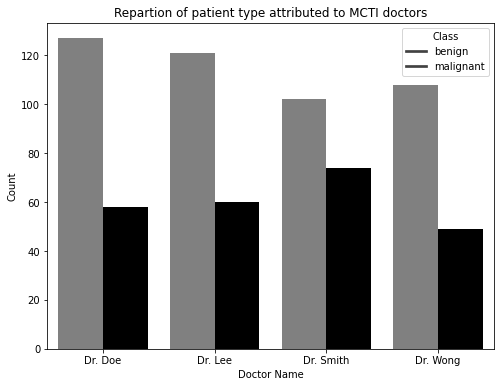

In [16]:
#### Question 8
def get_table(breast_dataset, col1, col2):
    patient_type_per_doctor = pd.DataFrame({'count': breast_dataset.groupby(by=[col1, col2]).size()}).reset_index() 
    return patient_type_per_doctor

def display_barplot(table, title, width, height):
    fig = plt.figure(figsize=(width,height))
    sns.barplot(data=table, y='count', x='doctor_name', hue='class', palette=['gray', 'black'])
    plt.xlabel('Doctor Name')
    plt.ylabel('Count')
    plt.legend(title='Class', labels={'benign':'gray', 'malignant':'red'}, loc='best')
    plt.title(title)
    plt.show()

#### Question 9
def main(title, width, height):
    table = get_table(breast_dataset, 'doctor_name', 'class')
    display_barplot(table, title, width, height)

main('Repartion of patient type attributed to MCTI doctors', 8, 6)

### II. Accessing, slicing and selecting data

- Check this link if you want to all the secrets on <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html'>indexing and selecting data</a>

### 1. Accessing values from columns

In [17]:
 #### Collecting all column names in list
 list(breast_dataset.columns)

['patient_id',
 'clump_thickness',
 'cell_size_uniformity',
 'cell_shape_uniformity',
 'marginal_adhesion',
 'single_ep_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses',
 'class',
 'doctor_name']

In [18]:
#### Make a dataframe with the values that you find interesting (for example we could have get this table for the extra questions)
breast_dataset[['patient_id','class','doctor_name']]

,patient_id,class,doctor_name
0,1000025,benign,Dr. Doe
1,1002945,benign,Dr. Smith
2,1015425,benign,Dr. Lee
3,1016277,benign,Dr. Smith
4,1017023,benign,Dr. Wong
...,...,...,...
694,776715,benign,Dr. Lee
695,841769,benign,Dr. Smith
696,888820,malignant,Dr. Lee
697,897471,malignant,Dr. Lee


### 2. Select specific rows in the table based on their index

In [19]:
#### Collecting the information for one row
breast_dataset.iloc[5]

patient_id                 1017122
clump_thickness                  8
cell_size_uniformity            10
cell_shape_uniformity           10
marginal_adhesion                8
single_ep_cell_size              7
bare_nuclei                     10
bland_chromatin                  9
normal_nucleoli                  7
mitoses                          1
class                    malignant
doctor_name              Dr. Smith
Name: 5, dtype: object

In [20]:
breast_dataset[0:10] #### same as breast_dataset.head(n=10)

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
5,1017122,8.0,10.0,10,8,7,10,9.0,7.0,1,malignant,Dr. Smith
6,1018099,1.0,NaN,1,1,2,10,3.0,1.0,1,benign,Dr. Doe
7,1018561,2.0,1.0,2,1,2,1,3.0,1.0,1,benign,Dr. Smith
8,1033078,2.0,1.0,1,1,2,1,1.0,1.0,5,benign,Dr. Smith
9,1033078,4.0,2.0,1,1,2,1,2.0,1.0,1,benign,Dr. Doe


### Following the previous example, what is the equivalent of the line `breast_dataset.tail(n=10)`



In [21]:
#### Answer
breast_dataset[len(breast_dataset)-10:len(breast_dataset)]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
689,654546,1.0,1.0,1,1,2,1,1.0,1.0,8,benign,Dr. Lee
690,654546,1.0,1.0,1,3,2,1,1.0,1.0,1,benign,Dr. Doe
691,695091,5.0,10.0,10,5,4,5,4.0,4.0,1,malignant,Dr. Wong
692,714039,3.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Wong
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee
698,897471,4.0,8.0,8,5,4,5,10.0,4.0,1,malignant,Dr. Wong


### 3. Selecting specific rows based on a condition

In [22]:
#### With numbers 
breast_dataset[breast_dataset['mitoses'] == 10 ]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
65,1116998,10.0,4.0,2,1,3,2,4.0,3.0,10,malignant,Dr. Smith
71,1123061,6.0,10.0,2,8,10,2,7.0,8.0,10,malignant,Dr. Smith
85,1147748,5.0,10.0,6,1,10,4,4.0,10.0,10,malignant,Dr. Smith
98,1165926,9.0,6.0,9,2,10,6,2.0,9.0,10,malignant,Dr. Lee
167,1198128,10.0,8.0,10,10,6,1,3.0,1.0,10,malignant,Dr. Smith
187,1206841,10.0,5.0,6,10,6,10,7.0,7.0,10,malignant,Dr. Wong
236,1241559,10.0,8.0,8,2,8,10,4.0,8.0,10,malignant,Dr. Wong
238,1242364,8.0,10.0,10,8,6,9,3.0,10.0,10,malignant,Dr. Wong
286,529329,10.0,10.0,10,10,10,10,4.0,10.0,10,malignant,Dr. Doe
302,640744,10.0,10.0,10,7,9,10,7.0,10.0,10,malignant,Dr. Wong


In [23]:
breast_dataset[breast_dataset['mitoses'] < 3 ]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


In [24]:
#### Collect the patients with the smallest and highest cell size uniformity
breast_dataset[(breast_dataset['cell_size_uniformity'] == 1) | (breast_dataset['cell_size_uniformity'] == 10 )]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
5,1017122,8.0,10.0,10,8,7,10,9.0,7.0,1,malignant,Dr. Smith
7,1018561,2.0,1.0,2,1,2,1,3.0,1.0,1,benign,Dr. Smith
...,...,...,...,...,...,...,...,...,...,...,...,...
692,714039,3.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Wong
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith


Alternative line code: <br>
`breast_dataset[(breast_dataset['cell_size_uniformity'] == breast_dataset['cell_size_uniformity'].min()) | (breast_dataset['cell_size_uniformity'] == breast_dataset['cell_size_uniformity'].max() )]`

In [25]:
#### For a string value
breast_dataset[breast_dataset['class'] == 'benign']

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
690,654546,1.0,1.0,1,3,2,1,1.0,1.0,1,benign,Dr. Doe
692,714039,3.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Wong
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee


In [26]:
#### For a list of keywords
breast_dataset[breast_dataset['doctor_name'].isin(['Dr. Smith', 'Dr. Lee'])]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
5,1017122,8.0,10.0,10,8,7,10,9.0,7.0,1,malignant,Dr. Smith
7,1018561,2.0,1.0,2,1,2,1,3.0,1.0,1,benign,Dr. Smith
...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee



### III. Dealing with missing values

### 1. How many missing values per column do we have?

In [27]:
#### NB: In numpy, missing values can be defined with np.nan
breast_dataset.isna().sum() 

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

### Determinant choice: What can we do with these missing values?
- [ ] Replace them with zero! - 1
- [ ] Remove them all! - 2



In [28]:
#### If you choose, solution 1, run this cell
breast_dataset_with_zero = breast_dataset.fillna(0)

breast_dataset_with_zero.isna().sum() 

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [29]:
#### If you choose, solution 2, run this cell
breast_dataset_with_nona = breast_dataset.dropna()  #drop rows with any column having np.nan values

breast_dataset_with_nona.isna().sum()

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

### 2. What is the difference of these two methods?

In [30]:
print('Dataset with zero:', breast_dataset_with_zero.shape)
print('Dataset with no NA:', breast_dataset_with_nona.shape) 

Dataset with zero: (699, 12)
Dataset with no NA: (690, 12)


In [31]:
#### Let's take the dataframe with no na values
breast_dataset_with_nona 

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


In [32]:
#### Reindexing your table after removing few lines - step 1
breast_dataset_with_nona = breast_dataset_with_nona.reset_index()
breast_dataset_with_nona

,index,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
686,695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
687,696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
688,697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


In [33]:
#### Reindexing your table after removing few lines - step 2
breast_dataset_with_nona = breast_dataset_with_nona.drop(columns='index')
breast_dataset_with_nona

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
685,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
686,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
687,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
688,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


### 3. How many unique patients do we have after removing data?  

In [34]:
breast_dataset.nunique()

patient_id               645
clump_thickness           10
cell_size_uniformity      10
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               11
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
doctor_name                4
dtype: int64

### Do you have a better solution to deal with missing data?
- Let's ask hear Mavie's solution!

### Try to implement Mavie'solution

In [35]:
#### Cell for Mavie's solution



### How can we explain that we found 645 patients in the study when we have 690 rows in our table?

### IV. Cleaning the dataframe by removing duplicated data



### 1. Identify all lines with duplicated patient_id

In [36]:
repeat_patients = breast_dataset.duplicated(subset='patient_id', keep=False) #### keep=False 
                                                                             #### --> Mark all duplicates as True.
repeat_patients

0      False
1      False
2      False
3      False
4       True
       ...  
694    False
695    False
696    False
697     True
698     True
Length: 699, dtype: bool

### 2. Collect all the lines with duplicated patient_id

In [37]:
breast_dataset[repeat_patients]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
8,1033078,2.0,1.0,1,1,2,1,1.0,1.0,5,benign,Dr. Smith
9,1033078,4.0,2.0,1,1,2,1,2.0,1.0,1,benign,Dr. Doe
29,1070935,1.0,1.0,3,1,2,1,1.0,1.0,1,benign,Dr. Doe
30,1070935,3.0,1.0,1,1,1,1,2.0,1.0,1,benign,Dr. Smith
...,...,...,...,...,...,...,...,...,...,...,...,...
689,654546,1.0,1.0,1,1,2,1,1.0,1.0,8,benign,Dr. Lee
690,654546,1.0,1.0,1,3,2,1,1.0,1.0,1,benign,Dr. Doe
691,695091,5.0,10.0,10,5,4,5,4.0,4.0,1,malignant,Dr. Wong
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


### 3. Removing duplicated lines

In [42]:
breast_dataset = breast_dataset.drop_duplicates(subset='patient_id', keep ='first') #### keep='first'
                                                           #### Mark duplicates as True except for the first occurrence.

In [43]:
breast_dataset

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee


### V. Customizing your dataframe

Situation 2:
The AEBINUM association want your help, they have collected two tables that list the graduated alumni of the bioinformatics program and need to do some statistics on them. As they are dealing with the organization of different events, they kindly ask you some help. 

### 1. First mission: Charge the two tables


In [52]:
master_table_path = 'https://raw.githubusercontent.com/ladyson1806/AEBINUM/master/collect_grad_alumni/2020/AEBINUM_MASTER_ALUMN_LIST_2020.csv'

phd_table_path = 'https://raw.githubusercontent.com/ladyson1806/AEBINUM/master/collect_grad_alumni/2020/AEBINUM_PHD_ALUMN_LIST_2020.csv'

In [53]:
#### Charge your data
master_table = pd.read_csv(master_table_path)
phd_table = pd.read_csv(phd_table_path)

### 2. Mission 2: Add a student_type column in each table 

In [197]:
master_table['grade_etudiant'] = 'master'
master_table.head()

,Programme,Etudiant_Directeur,Titre_Projet,Manuscrit_soumis,Grade_obtenu,grade_etudiant
0,Bio-informatique,Geneviève Boucher / Normand Mousseau,Exploration des mécanismes d’agrégation de pep...,07/12/2005,12/01/2006,master
1,Bio-informatique,Mohamed Tikah Marrakchi / Sylvie Hamel / co: A...,Helix Explorer : une nouvelle base de données ...,21/12/2006,01/02/2007,master
2,Bio-informatique,Valentin Guignon / Sylvie Hamel / co : Cedric ...,Algorithme de comparaison de structures second...,07/11/2006,07/12/2006,master
3,Bio-informatique,Tan Wang / Joelle Pelletier,Linker-scanning analysis of the HIV-1 integras...,28/04/2006,05/10/2006,master
4,Bio-informatique,Audrey Noël / Pavel Hamet / co : Ettore Merlo,Recherche de déterminants génomiques impliqués...,17/12/2007,07/02/2008,master


In [198]:
#### Your turn!
phd_table['grade_etudiant'] = 'phd'
phd_table.head()

,Programme,Etudiant_Directeur,Titre_Projet,Manuscrit_soumis,Grade_obtenu,grade_etudiant
0,Bio-informatique,Sivakumar Kannan / Gertraud Burger,Molecular protein function prediction using se...,17/12/2007,07/02/2008,phd
1,Bio-informatique,Nicolas Rodrigue / Hervé Philippe,Phylogenetic structural modeling of molecular ...,14/12/2007,07/02/2008,phd
2,Bio-informatique,Emmanuelle Permal / François Major,Étude de la structure tertiaire des motifs ARN...,07/08/2007,04/10/2007,phd
3,Bio-informatique,Yan Zhou / Hervé Philippe,Modeling heterotachy in phylogenetics,27/08/2009,08/10/2009,phd
4,Bio-informatique,Claudia Laura Kleinman / Hervé Philippe,Statistical potentials for evolutionary studies,28/09/2010,04/11/2010,phd


### 3. Mission 3: Can you make only one table? (Concatening table)



In [56]:
final_table = phd_table.append(master_table)
final_table

,Programme,Etudiant_Directeur,Titre_Projet,Manuscrit_soumis,Grade_obtenu,grade_etudiant
0,Bio-informatique,Sivakumar Kannan / Gertraud Burger,Molecular protein function prediction using se...,17/12/2007,07/02/2008,phd
1,Bio-informatique,Nicolas Rodrigue / Hervé Philippe,Phylogenetic structural modeling of molecular ...,14/12/2007,07/02/2008,phd
2,Bio-informatique,Emmanuelle Permal / François Major,Étude de la structure tertiaire des motifs ARN...,07/08/2007,04/10/2007,phd
3,Bio-informatique,Yan Zhou / Hervé Philippe,Modeling heterotachy in phylogenetics,27/08/2009,08/10/2009,phd
4,Bio-informatique,Claudia Laura Kleinman / Hervé Philippe,Statistical potentials for evolutionary studies,28/09/2010,04/11/2010,phd
...,...,...,...,...,...,...
53,Bio-informatique,Louis Gendron / / Sebastian Pechmann,Adaptation de la levure à la suite des perturb...,2019-11-12,2020-03-18,master
54,Bio-informatique,Redha Attaoua / / Pavel Hamet,Investigation génétique de NAFLD dans le diabè...,2019-11-08,2020-03-18,master
55,Bio-informatique,Cédric Roux / Daniel Sinnett /,Classification moléculaire des Tumeurs de Wilm...,2020-12-08,à venir,master
56,Bio-informatique,Sébastian Méric De Bellefon / Guillaume Lettre,Développement de méthodes bio-informatiques po...,2020-10-15,à venir,master


### VI. Your time to play! 

1. Clean the columns `Manuscrit_soumis` et `Grade_obtenu` by collecting only the year using the `re` package <br> and create two new columns with the results
    - More about regular expression in Python: https://docs.python.org/3/howto/regex.html
    - Hint: `re.findall()` documentation: https://blog.finxter.com/python-re-findall/
2. Display a countplot to show of the number of graduated alumni per manuscript submitting year split by `grade_etudiant`
    - Hint: `seaborn.countplot()` documentation: https://seaborn.pydata.org/generated/seaborn.countplot.html 
3. Optional: Propose ideas to make this table cleaner!
4. Optional: Propose interesting analyses to do on this table

In [57]:
#### Question 1
def get_year(x):
    if x == 'à venir':
        return np.nan
    else:
        year = re.findall(r'[0-9]{4}', x)[0]
        return year

final_table['Annee_soumission'] = final_table['Manuscrit_soumis'].apply(get_year)
final_table['Annee_diplome'] = final_table['Manuscrit_soumis'].apply(get_year)

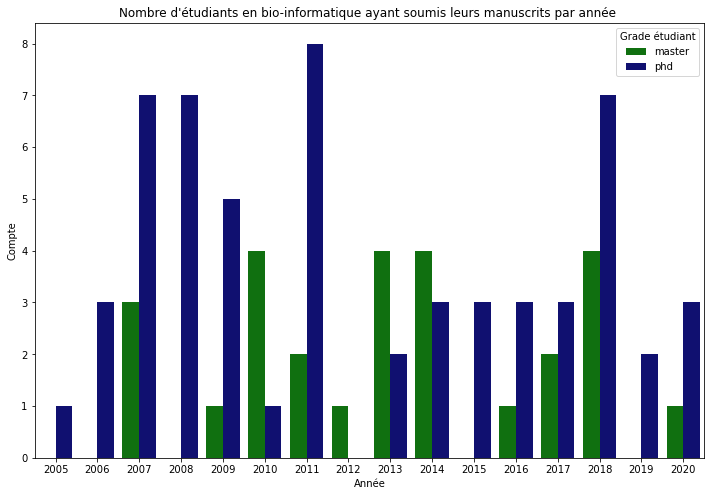

In [58]:
#### Question 2
fig = plt.figure(figsize=(12,8))
sns.countplot(data=final_table, x='Annee_soumission', hue='grade_etudiant', palette=['green', 'navy'])
plt.xlabel('Année')
plt.ylabel('Compte')
plt.legend(title='Grade étudiant', labels={'master':'green', 'phd':'navy'}, loc='best')
plt.title('Nombre d\'étudiants en bio-informatique ayant soumis leurs manuscrits par année ')
plt.show()


### Example of `df.merge()` utilization: 
- Create a table where you clean the column 'Etudiant_ Directeur' into two columns 'Etudiant' and 'Directeur'
- Merge this table with previous final_table
- Plot the number of students per reaearch director

In [191]:
to_clean = final_table[['Etudiant_Directeur', 'Titre_Projet']]

In [194]:
to_clean.head()

,Etudiant_Directeur,Titre_Projet,Etudiant,Directeur
0,Sivakumar Kannan / Gertraud Burger,Molecular protein function prediction using se...,Sivakumar Kannan,Gertraud Burger
1,Nicolas Rodrigue / Hervé Philippe,Phylogenetic structural modeling of molecular ...,Nicolas Rodrigue,Hervé Philippe
2,Emmanuelle Permal / François Major,Étude de la structure tertiaire des motifs ARN...,Emmanuelle Permal,François Major
3,Yan Zhou / Hervé Philippe,Modeling heterotachy in phylogenetics,Yan Zhou,Hervé Philippe
4,Claudia Laura Kleinman / Hervé Philippe,Statistical potentials for evolutionary studies,Claudia Laura Kleinman,Hervé Philippe


In [192]:
def get_people_name(x, role):
    people_list = x.split(' / ')
    if 'etudiant' in role:
        student = people_list[0]
        return student
    if 'directeur' in role:
        directeurs = people_list[1:]
        for directeur in directeurs :
            if '' == directeur:
                directeurs.remove(directeur)
            if '/ ' in directeur:
                old_format = directeur
                new_format = old_format.replace(f'/ ', '')
                directeurs.remove(old_format)
                directeurs.append(new_format)
        return ', '.join(directeurs)
        



In [193]:
to_clean['Etudiant'] = to_clean['Etudiant_Directeur'].apply(get_people_name, args=('etudiant',))
to_clean['Directeur'] = to_clean['Etudiant_Directeur'].apply(get_people_name, args=('directeur',))

In [195]:
to_clean.head()

,Etudiant_Directeur,Titre_Projet,Etudiant,Directeur
0,Sivakumar Kannan / Gertraud Burger,Molecular protein function prediction using se...,Sivakumar Kannan,Gertraud Burger
1,Nicolas Rodrigue / Hervé Philippe,Phylogenetic structural modeling of molecular ...,Nicolas Rodrigue,Hervé Philippe
2,Emmanuelle Permal / François Major,Étude de la structure tertiaire des motifs ARN...,Emmanuelle Permal,François Major
3,Yan Zhou / Hervé Philippe,Modeling heterotachy in phylogenetics,Yan Zhou,Hervé Philippe
4,Claudia Laura Kleinman / Hervé Philippe,Statistical potentials for evolutionary studies,Claudia Laura Kleinman,Hervé Philippe


In [154]:
to_merge = to_clean[['Titre_Projet', 'Etudiant', 'Directeur']] 

In [155]:
clean_table = final_table.merge(to_merge, on='Titre_Projet')
clean_table = clean_table.drop(columns='Etudiant_Directeur')

In [156]:
#### Final clean table sort with directeur in alphabetical order
clean_table = clean_table.sort_values('Directeur')

In [196]:

directeur_order = pd.DataFrame({'count': clean_table.groupby('Directeur').size()}).reset_index().sort_values('count', ascending=False)
directeur_order.head()

,Directeur,count
15,Hervé Philippe,7
11,François Major,7
37,Serguei Chteinberg,4
25,Nadia El-Mabrouk,4
14,Guillaume Lettre,3


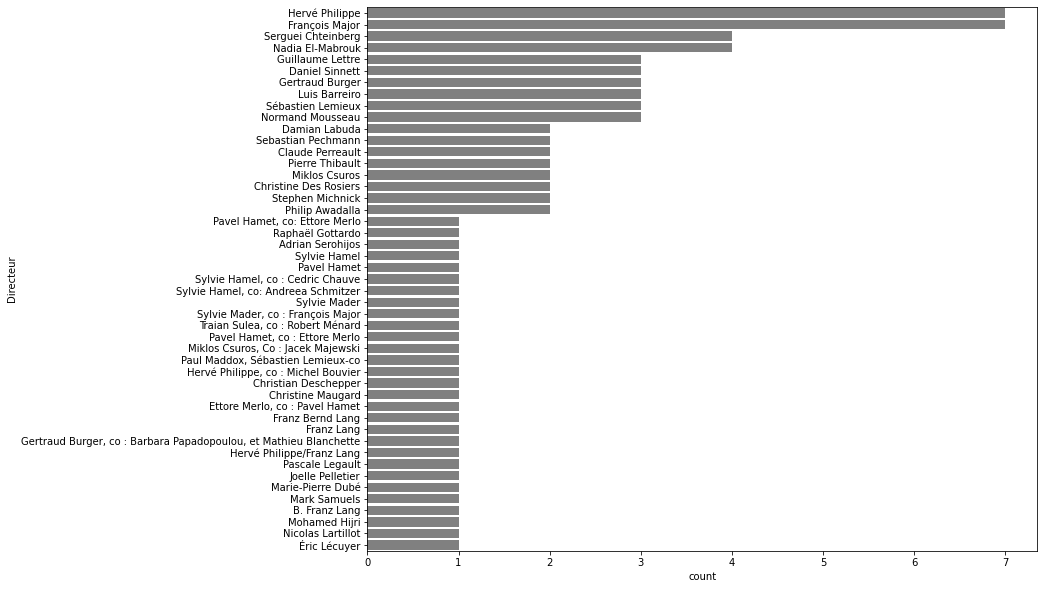

In [189]:
fig = plt.figure(figsize=(12,10))
sns.countplot(y=clean_table['Directeur'], order=directeur_order['Directeur'], color='grey')
plt.show()


### Extra resources:

- Merge, join, concatenate and compare: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- Regular expression in Python: https://docs.python.org/3/howto/regex.html